## Imports

In [1]:
# from tools import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import tqdm
import random

In [2]:
plt.rcdefaults()

## Getting a List of Images

In [114]:
import numpy as np
import matplotlib.pyplot as plt


def get_center(
    image_path, crop=None, h=100, skip_x=None, skip_y=None, contrast=110, plot=True
):
    """
    Determines the coordinates of center and the radius of the drop

    Parameters
    ----------
    image_path : str
        Path to the image
    crop : tuple with (x,y), optional
        Coordinates to crop the image. The default is None.
        x: int
            x-coordinate of the top-left corner
        y: int
            y-coordinate of the top-left corner
    h : int, optional
        Height of the image. The default is 100.
    skip_x : int, optional
        Number of pixels to skip in x direction. The default is None.
    skip_y : int, optional
        Number of pixels to skip in y direction. The default is None.
    contrast : int, optional
        Contrast threshold. The default is 110.
    plot : bool, optional
        If True, plots the image. The default is True.

    Returns
    -------
    r : int
        Radius of the drop
    (x,y) : tuple
        Coordinates of the center
    """
    # Reading image
    im = plt.imread(image_path)

    # Cropping image
    if crop is not None:
        crop = [crop[0], crop[1], crop[0] + h, crop[1] + h]
        im_c = im[crop[1] : crop[3], crop[0] : crop[2]]
    else:
        im_c = im

    # Using contrast threshold
    im_f = (im_c > contrast).astype(int)
    skip_pixels_x = skip_x if skip_x is not None else 0

    # Along axis 0
    xs = im_f.argmin(axis=0)
    xss = np.nonzero(xs)
    xl = skip_pixels_x + xss[0][0]
    xr = skip_pixels_x + xss[0][-1]

    # Along axis 1
    skip_pixels_y = skip_y if skip_y is not None else 0
    ys = im_f.argmin(axis=1)
    yss = np.nonzero(ys)
    yu = yss[0][0]
    yd = yss[0][-1]

    # Calculating center and radius
    r1 = np.abs((xl - xr)) / 2
    r2 = np.abs((yu - yd)) / 2
    r = int((r1 + r2) / 2)
    x = int(crop[0] + xl + r)
    y = int(crop[1] + yu + r)

    if plot:
        # Plotting the image with center
        plt.figure(figsize=(10, 10))
        plt.imshow(im, cmap="gray")
        plt.hlines(y, 0, im.shape[1], color="g")
        plt.vlines(x, 0, im.shape[0], color="b")
        plt.annotate(f"{x,y}", xy=(x, y), xytext=(x + 20, y + 30), color="r")
        plt.grid()
        plt.show()
    return r, (x, y)


In [4]:
files = os.listdir("Images")
images = [f for f in files if f.endswith(".jpg")]
len(images)

171

In [5]:
id = [num for num in range(0, len(images))]
img_path = ["Images/" + str(num) + ".jpg" for num in range(0, len(images))]

In [6]:
df = pd.DataFrame({"id": id, "image_path": img_path})
df.head()

id    image_path
0   0  Images/0.jpg
1   1  Images/1.jpg
2   2  Images/2.jpg
3   3  Images/3.jpg
4   4  Images/4.jpg

In [7]:
# df.to_csv("images.csv", index=False)

In [7]:
def show_image(image_path):
    plt.figure(figsize=(10, 10))
    plt.imshow(plt.imread(image_path), cmap="gray")
    plt.grid()
    plt.title(image_path)
    plt.show()

## Brute Force

In [9]:
coordinates = []
crop = (800, 450)
for f in tqdm.tqdm(df["image_path"], desc="Extracting coordinates..."):
    try:
        coordinates.append(get_center(f, plot=False, crop=crop))
    except:
        coordinates.append(None)

Extracting coordinates...: 100%|██████████| 171/171 [00:02<00:00, 83.13it/s]


In [10]:
df["coordinates"] = coordinates
df.head()

id    image_path coordinates
0   0  Images/0.jpg        None
1   1  Images/1.jpg        None
2   2  Images/2.jpg        None
3   3  Images/3.jpg        None
4   4  Images/4.jpg        None

In [11]:
df["coordinates"].notna().sum()

31

In [12]:
df[df["coordinates"].notna()]

id     image_path       coordinates
35  35  Images/35.jpg   (2, (867, 452))
36  36  Images/36.jpg   (4, (867, 454))
37  37  Images/37.jpg   (5, (866, 455))
38  38  Images/38.jpg   (6, (866, 456))
39  39  Images/39.jpg   (6, (867, 456))
40  40  Images/40.jpg   (9, (867, 459))
41  41  Images/41.jpg  (10, (868, 460))
42  42  Images/42.jpg  (10, (868, 461))
43  43  Images/43.jpg  (10, (868, 464))
44  44  Images/44.jpg  (10, (868, 467))
45  45  Images/45.jpg  (10, (868, 470))
46  46  Images/46.jpg  (11, (869, 474))
47  47  Images/47.jpg  (10, (868, 477))
48  48  Images/48.jpg  (10, (868, 482))
49  49  Images/49.jpg  (10, (867, 486))
50  50  Images/50.jpg  (10, (867, 490))
51  51  Images/51.jpg  (10, (867, 494))
52  52  Images/52.jpg  (10, (867, 497))
53  53  Images/53.jpg  (10, (867, 501))
54  54  Images/54.jpg  (10, (867, 505))
55  55  Images/55.jpg  (10, (868, 509))
56  56  Images/56.jpg  (10, (868, 513))
57  57  Images/57.jpg  (10, (867, 517))
58  58  Images/58.jpg  (10, (867, 522))
59  59  Images/59.jpg  (10, (867, 526))
60  60  Images/60.jpg  (10, (867, 532))
61  61  Images/61.jpg  (10, (867, 537))
62  62  Images/62.jpg   (9, (865, 541))
63  63  Images/63.jpg   (8, (864, 546))
64  64  Images/64.jpg   (7, (863, 549))
65  65  Images/65.jpg   (3, (863, 550))

In [13]:
df.to_csv("coordinates.csv", index=False)

### Corner Cases

In [14]:
images = df["image_path"]

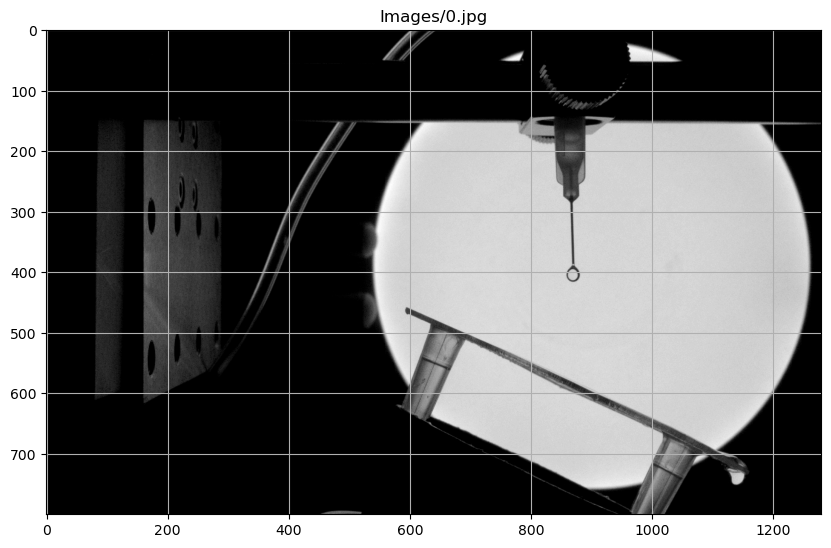

In [17]:
show_image(images[0])

1


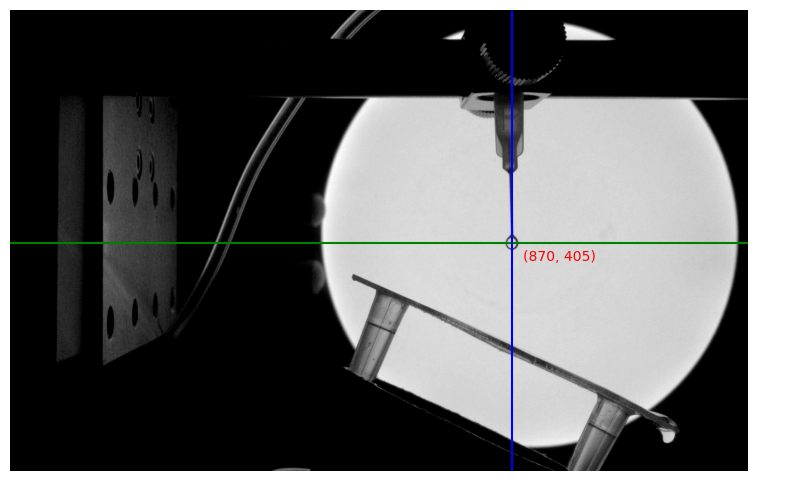

5


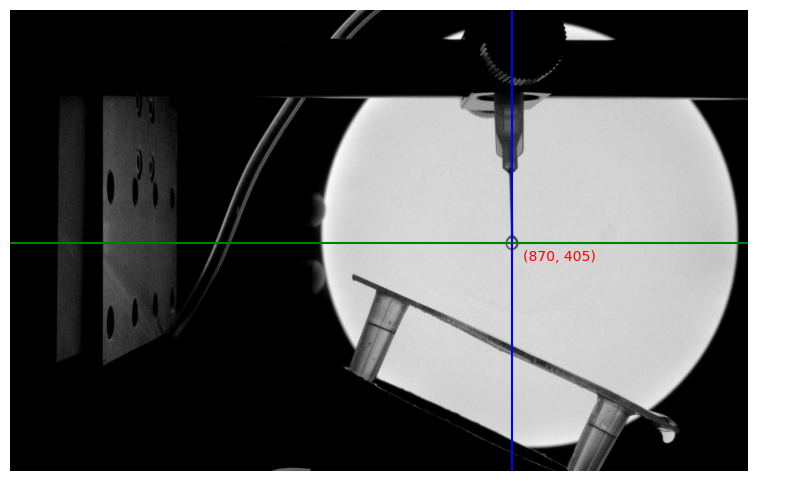

10


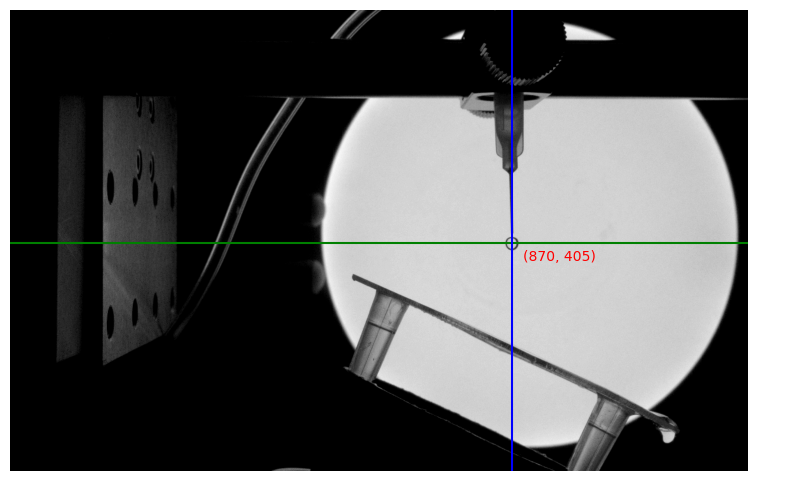

20


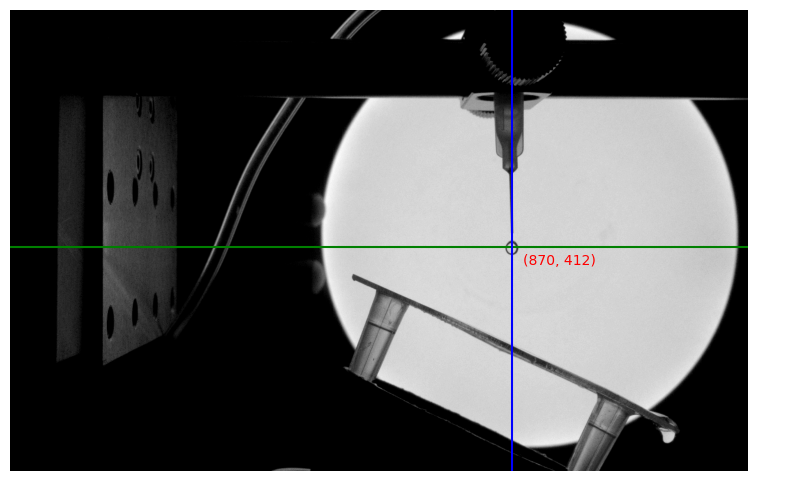

30


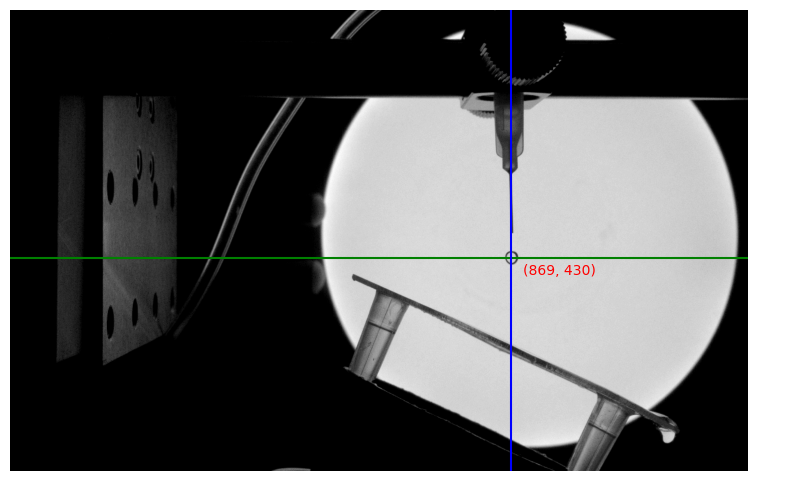

40


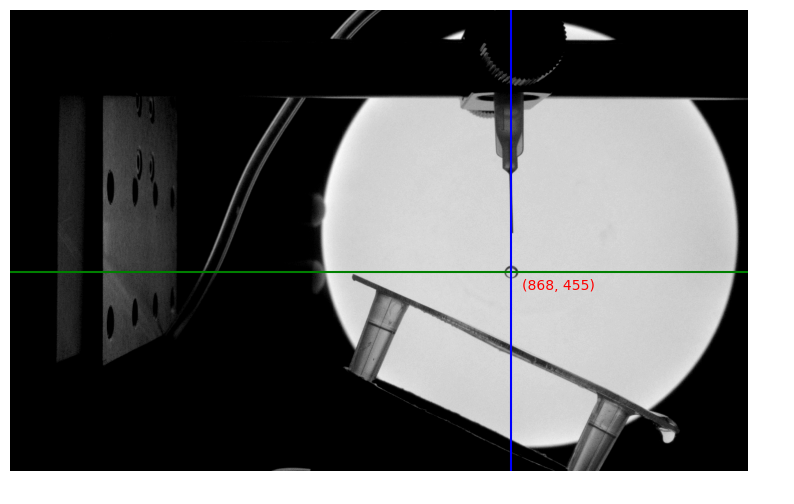

50


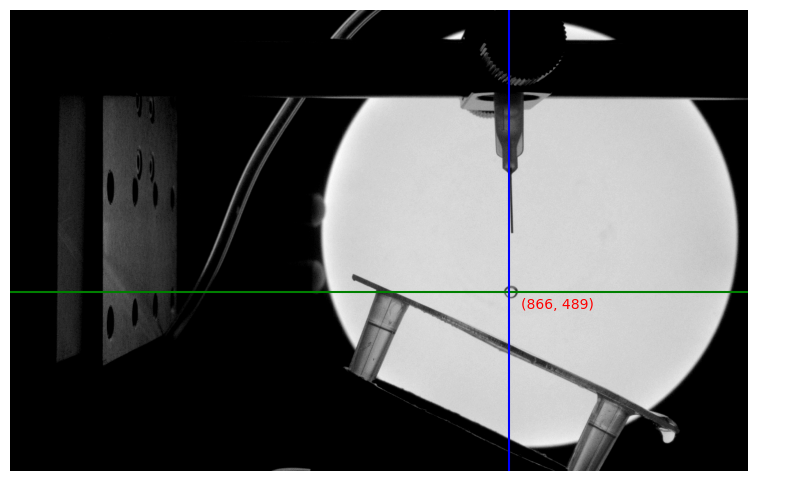

60


IndexError: index 0 is out of bounds for axis 0 with size 0

In [18]:
crop = (800, 395)
samples = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for sample in samples:
    print(sample)
    get_center(images[sample], plot=True, crop=crop)

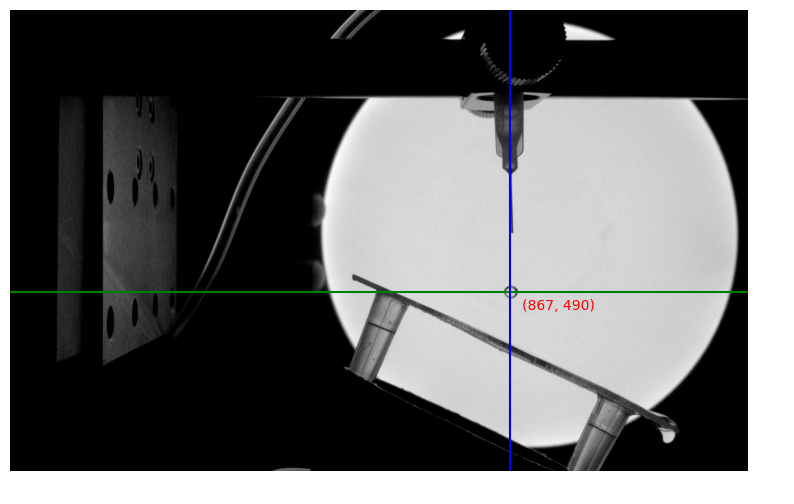

(10, (867, 490))

In [19]:
crop = (800, 410)
sample = 50
get_center(images[sample], plot=True, crop=crop)

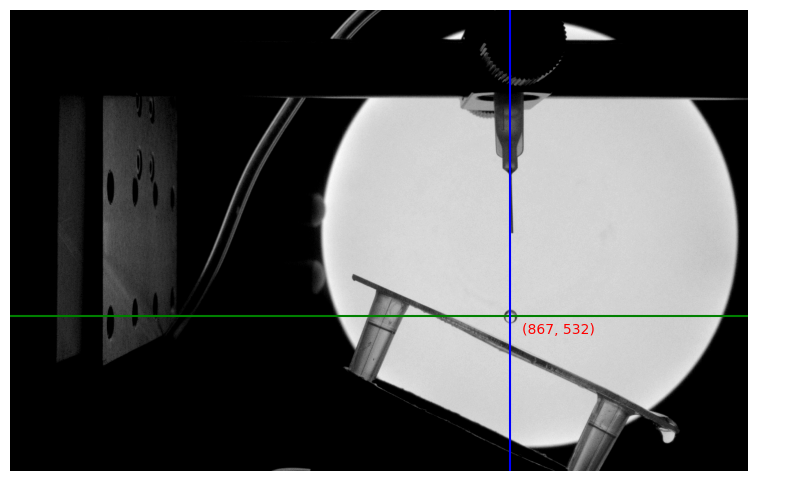

(10, (867, 532))

In [82]:
crop = (800, 450, 1000, 550)
sample = 60
get_center(images[sample],  plot=True, crop=crop)

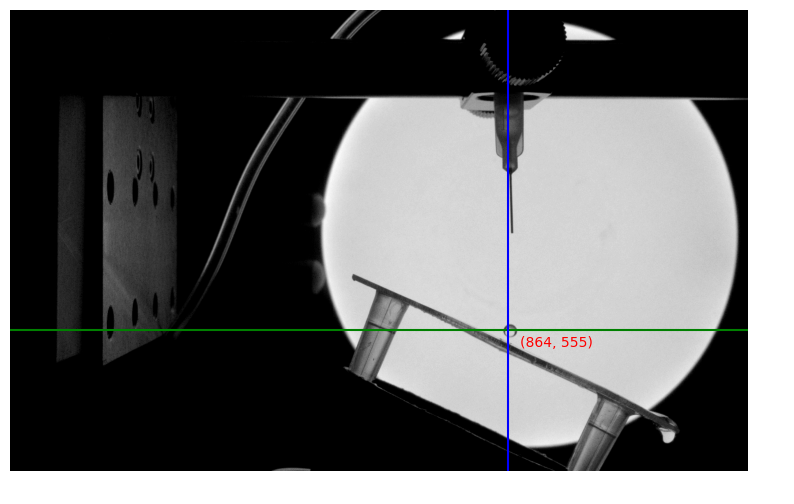

(8, (864, 555))

In [24]:
crop = (850, 510)
sample = 65
h=50
get_center(images[sample],  plot=True, crop=crop, h=h)

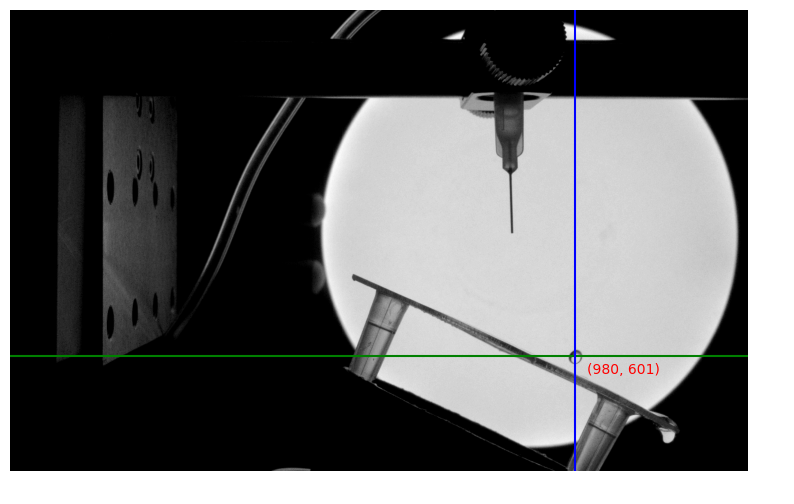

(10, (980, 601))

In [43]:
h=50
crop=(950, 570)
sample = 110
get_center(images[sample], plot=True, crop=crop, h=h)

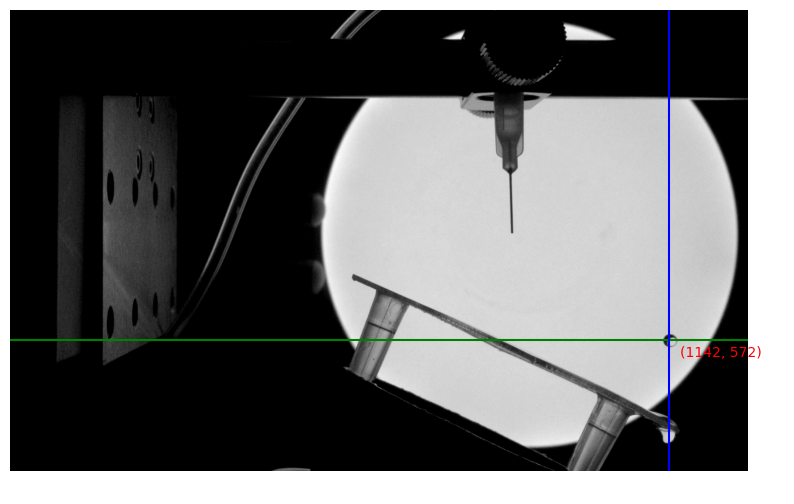

(9, (1142, 572))

In [70]:
h=100
crop=(1050, 490)
sample = 145
get_center(images[sample], plot=True, crop=crop, h=h)

For starting images, start from `(800, 395)`. Upto 35. Then use `(800, 410)` upto 50. Use `(800, 450)` for upto 60. Use `crop = (850, 500)` and `h=50` upto 65. Then collison starts and lasts for 107.

107-110 `h=50` `crop=(950, 570)`

The collison happens from 67 to 107.

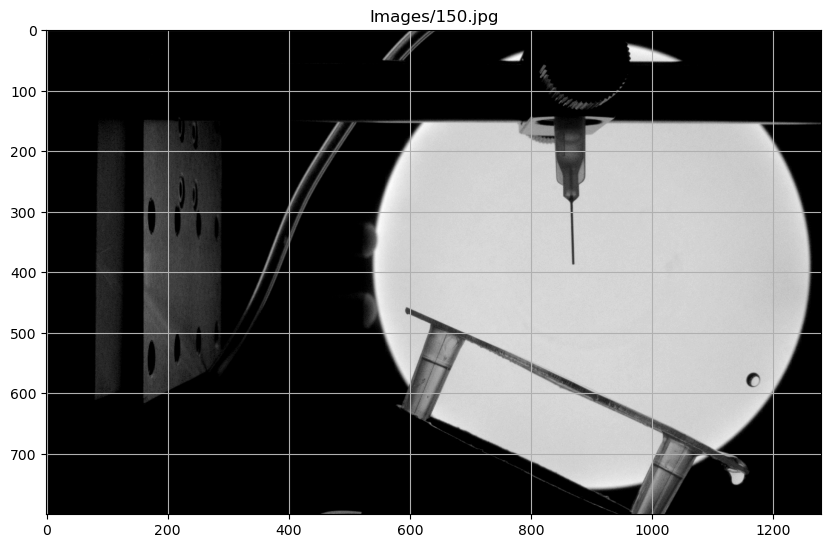

In [62]:
show_image(images[150])

## Using The coordinates to guide

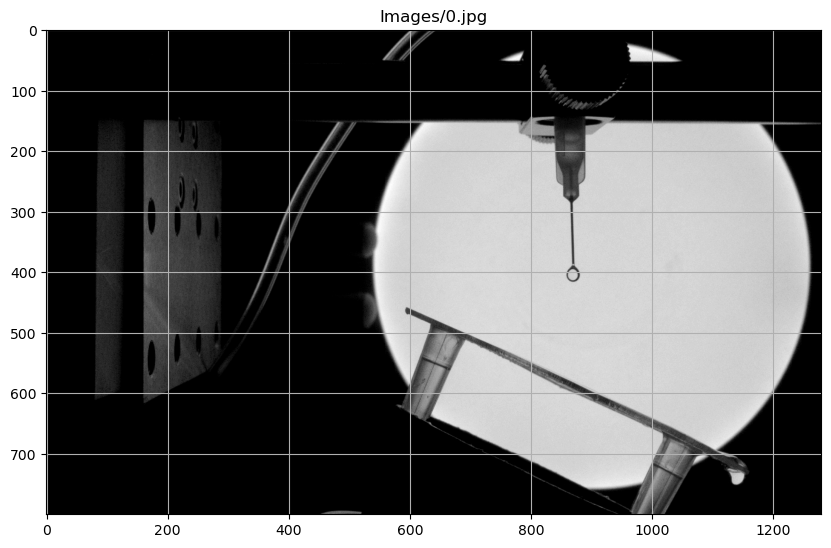

In [8]:
show_image(img_path[0])

### Upto Collision

In [115]:
x= 850
y=390
h = 40
r, (xc_p, yc_p) = get_center(img_path[0], plot=False, crop=(x, y), h=h)
centers = {
    img_path[0]: (xc_p, yc_p),
}
radii = {
    img_path[0]: r,
}
for img in img_path[1:66]:
    # print(img)
    r, (xc, yc) = get_center(img, plot=False, crop=(x, y), h=h)
    x = x+(xc-xc_p)
    y = y+(yc-yc_p)
    centers[img] = (xc, yc)
    radii[img] = r
    xc_p = xc
    yc_p = yc

In [66]:
img

'Images/125.jpg'

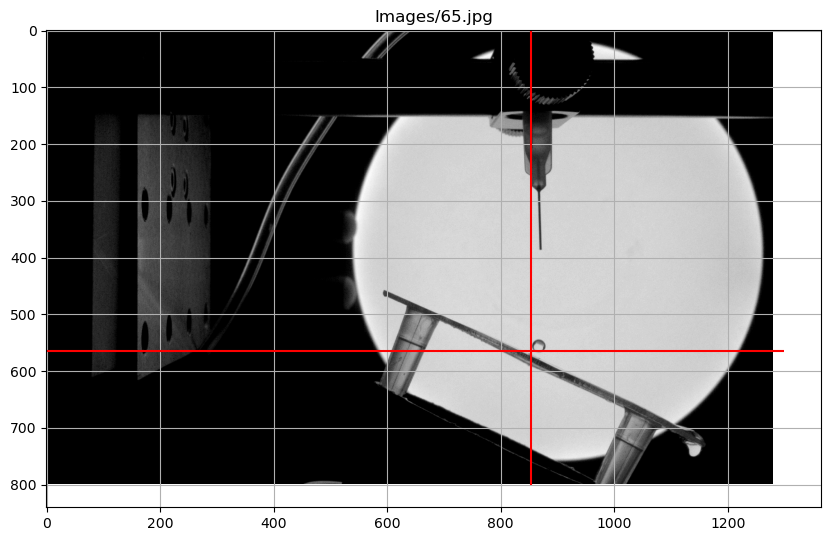

In [116]:
image_path = list(centers.keys())[65]
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread(image_path), cmap="gray")
plt.grid()
plt.title(image_path)
plt.hlines(centers[image_path][1], 0, 1300, color="r")
plt.vlines(centers[image_path][0], 0, 800, color="r")
plt.show()

### Below the Film

In [117]:
x = 820
y= 600
h=50
r, (xc_p, yc_p) = get_center(img_path[75], plot=False, crop=(x, y), h=h)
# centers = {
#     img_path[0]: (xc_p, yc_p),
# }
for img in img_path[76:100]:
    # print(img)
    r, (xc, yc) = get_center(img, plot=False, crop=(x, y), h=h)
    x = x+(xc-xc_p)
    y = y+(yc-yc_p)
    centers[img] = (xc, yc)
    radii[img] = r
    xc_p = xc
    yc_p = yc

In [118]:
img

'Images/99.jpg'

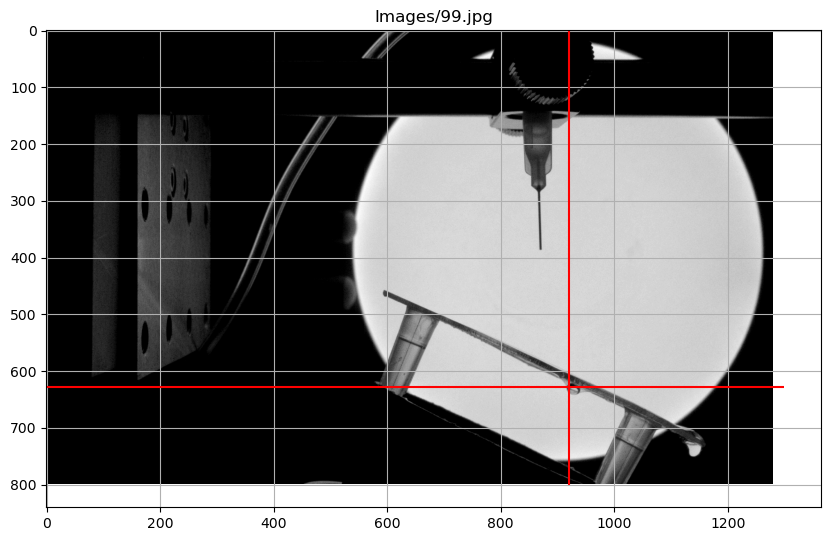

In [119]:
image_path = list(centers.keys())[-1]
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread(image_path), cmap="gray")
plt.grid()
plt.title(image_path)
plt.hlines(centers[image_path][1], 0, 1300, color="r")
plt.vlines(centers[image_path][0], 0, 800, color="r")
plt.show()

### Above film (After Collision)

In [120]:
x = 950
y= 580
h=40
r, (xc_p, yc_p) = get_center(img_path[106], plot=False, crop=(x, y), h=h)
# centers = {
#     img_path[0]: (xc_p, yc_p),
# }
for img in img_path[107:-16]:
    # print(img)
    r, (xc, yc) = get_center(img, plot=False, crop=(x, y), h=h)
    x = x+(xc-xc_p)
    y = y+(yc-yc_p)
    centers[img] = (xc, yc)
    radii[img] = r
    xc_p = xc
    yc_p = yc

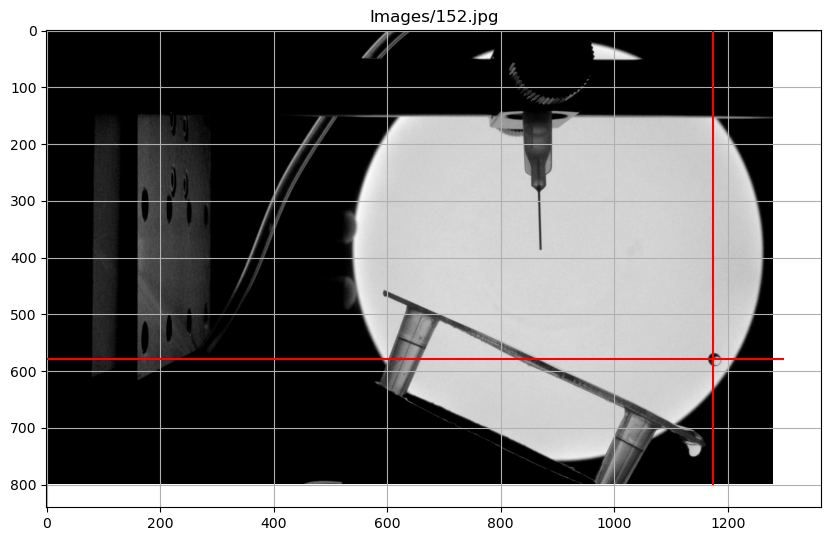

In [121]:
image_path = list(centers.keys())[-3]
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread(image_path), cmap="gray")
plt.grid()
plt.title(image_path)
plt.hlines(centers[image_path][1], 0, 1300, color="r")
plt.vlines(centers[image_path][0], 0, 800, color="r")
plt.show()

In [122]:
len(centers), len(img_path)

(138, 171)

### Some  Sample Images

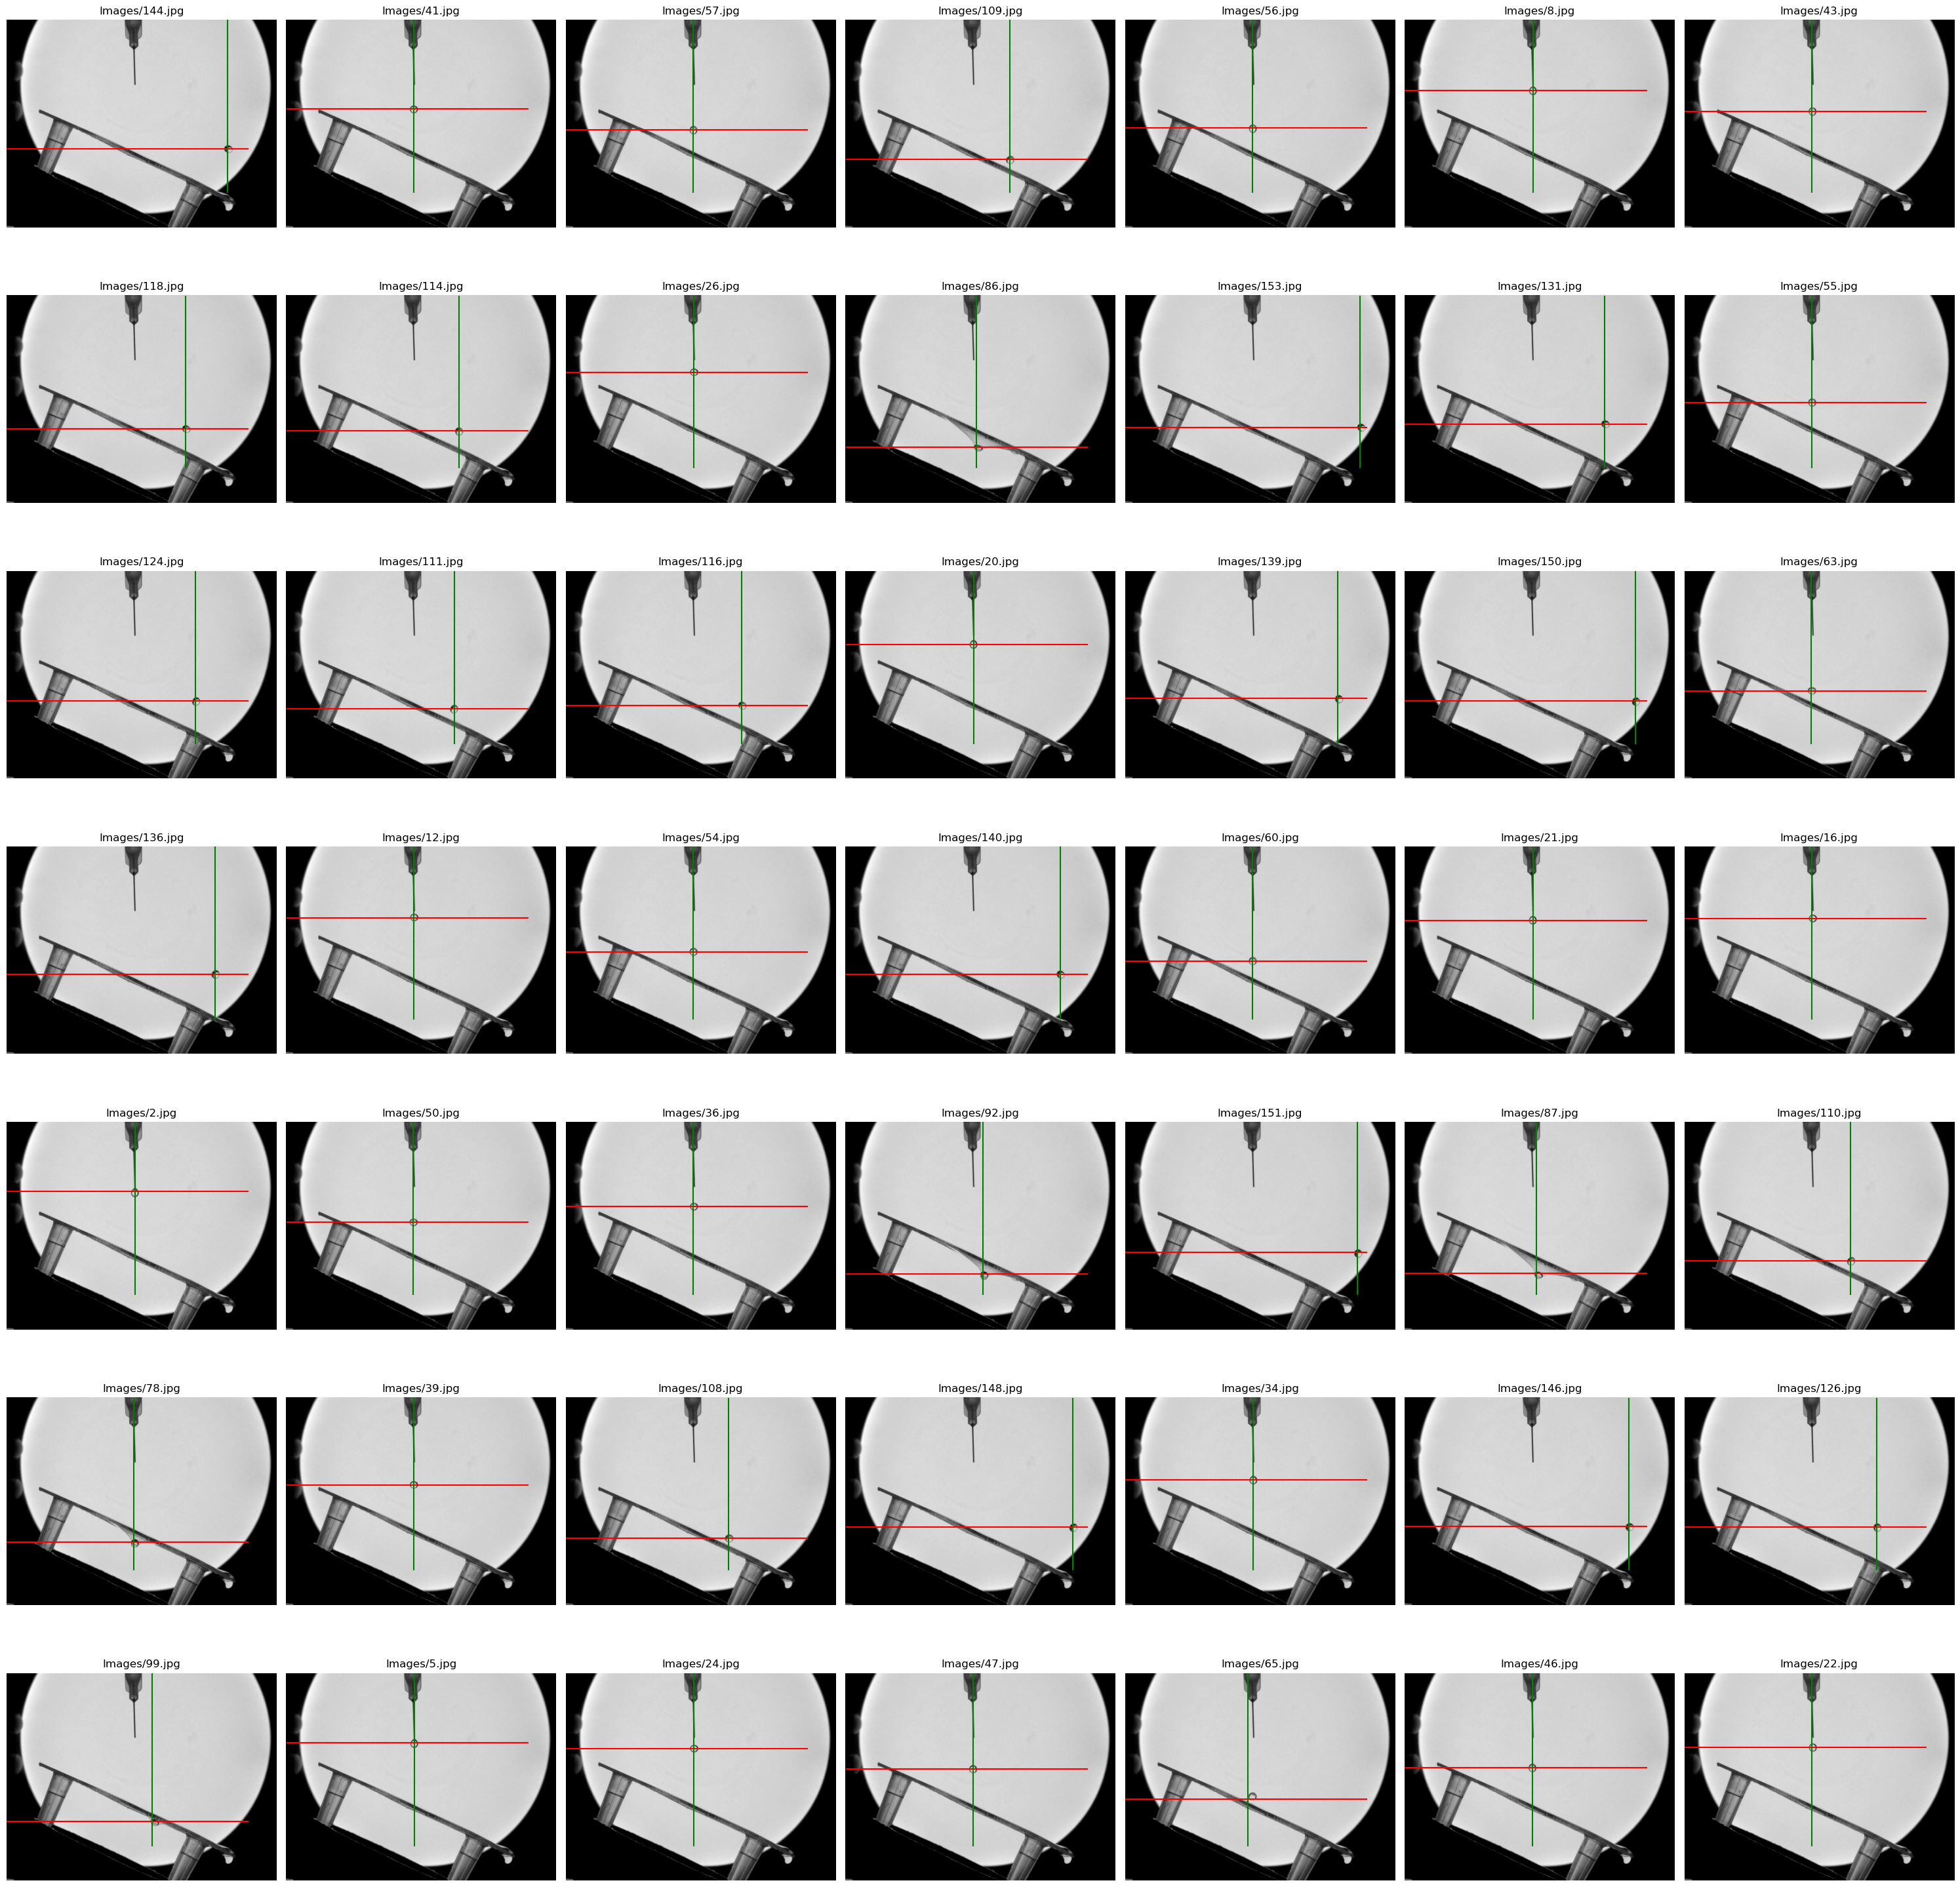

In [123]:
len_samples = 49
plt.figure(figsize=(30, 30))
samples = random.sample(list(centers.keys()), len_samples)
for img in samples:
    plt.subplot(7, 7, samples.index(img)+1)
    x, y = centers[img]
    plt.imshow(plt.imread(img)[200:, 500:], cmap="gray")
    plt.hlines(y-200, 0, 1300-600, color="r")
    plt.vlines(x-500, 0, 800-300, color="g")
    plt.title(img)
    plt.axis("off")
plt.tight_layout()
plt.savefig("samples.png")

In [124]:
df = pd.DataFrame(centers).T.reset_index()
df.columns =["image_path", "x", "y"]
df.head()

image_path    x    y
0  Images/0.jpg  871  401
1  Images/1.jpg  871  401
2  Images/2.jpg  871  401
3  Images/3.jpg  871  401
4  Images/4.jpg  871  401

In [125]:
df["Radius"] = list(radii.values())

In [126]:
df.to_csv("centers.csv", index=False)

## A Preliminary Analysis of the Coordinates

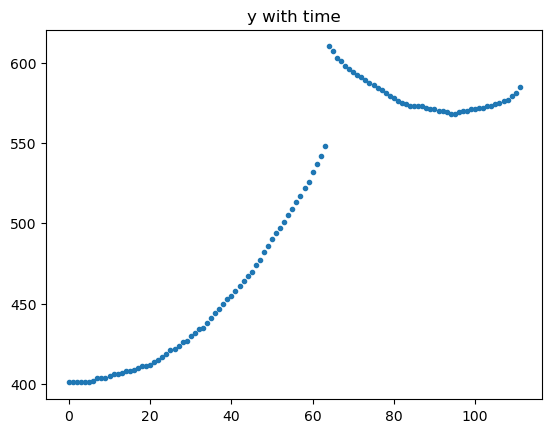

In [205]:
plt.plot(df["y"], ".")
plt.title("y with time");

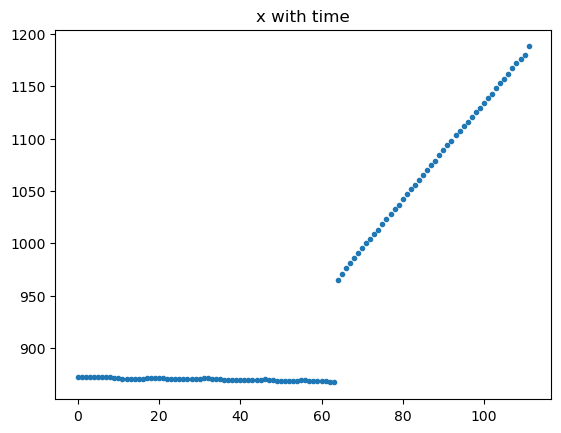

In [206]:
plt.plot(df["x"], ".")
plt.title("x with time");

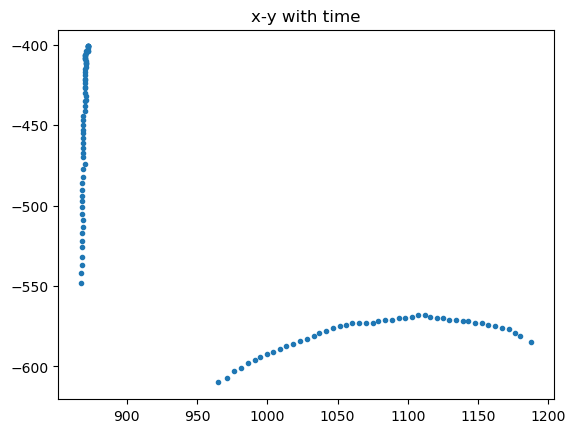

In [207]:
plt.plot(df["x"], -df["y"], ".")
plt.title("x-y with time");

In [208]:
df["vy"] = df["y"].diff()
df["vx"] = df["x"].diff()
df["v"] = np.sqrt(df["vy"]**2 + df["vx"]**2)

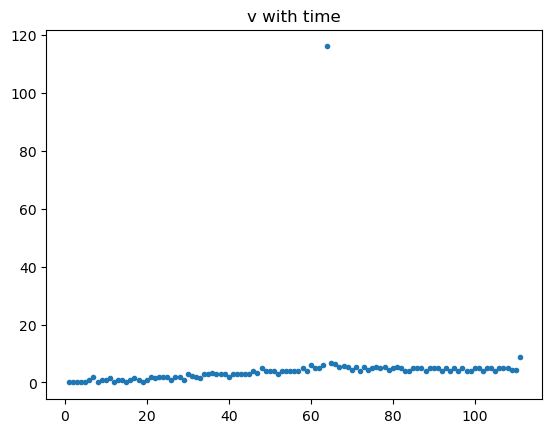

In [209]:
plt.plot(df["v"], ".")
plt.title("v with time");

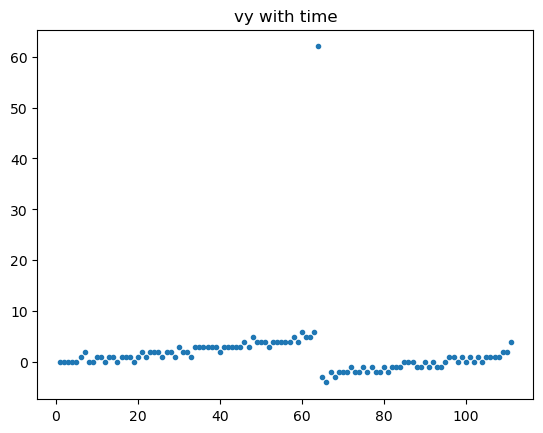

In [210]:
plt.plot(df["vy"], ".")
plt.title("vy with time");

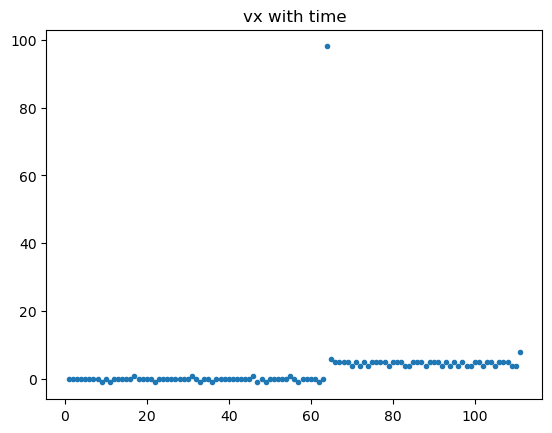

In [211]:
plt.plot(df["vx"], ".")
plt.title("vx with time");

In [212]:
df.describe()

x           y      Radius          vy          vx           v
count   112.000000  112.000000  112.000000  111.000000  111.000000  111.000000
mean    958.375000  504.035714    9.955357    1.657658    2.846847    4.513423
std     111.182921   74.036384    0.591050    6.156291    9.438026   10.833794
min     867.000000  401.000000    9.000000   -4.000000   -1.000000    0.000000
25%     870.000000  425.500000   10.000000    0.000000    0.000000    2.000000
50%     872.000000  511.000000   10.000000    1.000000    0.000000    4.000000
75%    1057.000000  573.000000   10.000000    3.000000    5.000000    5.049510
max    1188.000000  610.000000   12.000000   62.000000   98.000000  115.965512